# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Read csv
data = pd.read_csv("churn.csv")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [ ]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analys missing values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [4]:
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [5]:
data.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [6]:
data.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [7]:
data.CustServCalls.value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: CustServCalls, dtype: int64

In [8]:
data.ContractRenewal.value_counts()

1    3010
0     323
Name: ContractRenewal, dtype: int64

In [9]:
data.DataPlan.value_counts()

0    2411
1     922
Name: DataPlan, dtype: int64

In [10]:
data.dtypes

Churn                int64
AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

# Exploratory Data Analysis

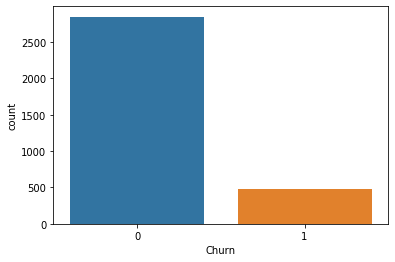

In [11]:
# Our label Distribution (countplot)
sns.countplot(data['Churn'])

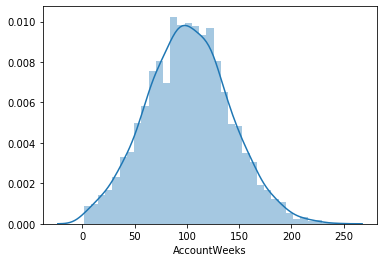

In [12]:
# Example EDA
sns.distplot(data['AccountWeeks'])

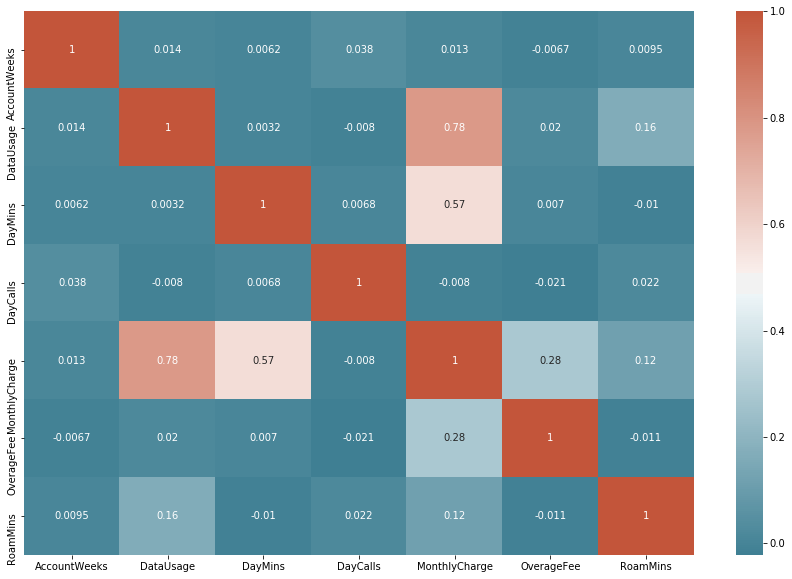

In [83]:
# Correlation between variables
cor = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

# Preprocessing


In [13]:
# Checking if the data contain duplicate

sum(data.duplicated()) # There are no duplicated values in the dataset

0

In [15]:
# Checking the data type
data.dtypes

Churn                int64
AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

In [16]:
# coverting variables into categories

data['Churn'] = data['Churn'].astype('category')
data['ContractRenewal'] = data['ContractRenewal'].astype('category')
data['DataPlan'] = data['DataPlan'].astype('category')
data['CustServCalls'] = data['CustServCalls'].astype('category')

In [17]:
data.dtypes

Churn              category
AccountWeeks          int64
ContractRenewal    category
DataPlan           category
DataUsage           float64
CustServCalls      category
DayMins             float64
DayCalls              int64
MonthlyCharge       float64
OverageFee          float64
RoamMins            float64
dtype: object

In [18]:
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [19]:
# Dividing the dataset into target and feature vaiables

y = data['Churn'].values   # target
X = data.drop(columns=['Churn'])  # features

In [20]:
X.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [21]:
#Generating new features
data_new = pd.get_dummies(X)

In [22]:
data_new.head()

,AccountWeeks,DataUsage,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,ContractRenewal_0,ContractRenewal_1,DataPlan_0,...,CustServCalls_0,CustServCalls_1,CustServCalls_2,CustServCalls_3,CustServCalls_4,CustServCalls_5,CustServCalls_6,CustServCalls_7,CustServCalls_8,CustServCalls_9
0,128,2.7,265.1,110,89.0,9.87,10.0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,107,3.7,161.6,123,82.0,9.78,13.7,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,137,0.0,243.4,114,52.0,6.06,12.2,0,1,1,...,1,0,0,0,0,0,0,0,0,0
3,84,0.0,299.4,71,57.0,3.10,6.6,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,75,0.0,166.7,113,41.0,7.42,10.1,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [23]:
y.shape

(3333,)

In [24]:
X.shape

(3333, 10)

In [25]:
X.columns.values

array(['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge',
       'OverageFee', 'RoamMins'], dtype=object)

In [26]:
# Scale feature variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_Scaled = StandardScaler().fit_transform(X)

In [42]:
from sklearn.model_selection import train_test_split, cross_validate

X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.3, random_state=42)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2333, 10), (1000, 10), (2333,), (1000,))

# ML Application

In [69]:
# Confusion Matrix Function

def conf(model_name, X_test, y_test):
    y_pred = model_name.predict(X_test)
    forest_cm = confusion_matrix(y_pred, y_test)
    sns.heatmap(forest_cm, annot=True, fmt= '.2f', xticklabels=['1', '0'], yticklabels=['1', '0'])
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.title(str(model_name)[0: str(model_name).find('(')])

### Logistic Model

Training accuracy : 0.8568366909558508
Testing accuracy : 0.867
**********************************************
[[838  19]
 [114  29]]
**********************************************
Accuracy: 0.867
Precision: 0.6041666666666666
Recall: 0.20279720279720279
F1 Score: 0.3036649214659685


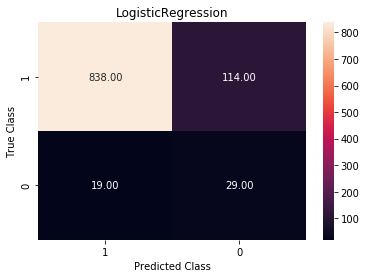

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix


# define model
model = LogisticRegression(random_state=42, n_jobs=-1)

# feeding the training set into the model
model.fit(X_train, y_train)

# predicting test set
y_pred1 = model.predict(X_test)

# evaluating models for the training and testing accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))
print('**********************************************')

# confusion matrix
print(confusion_matrix(y_test, y_pred1))
print('**********************************************')

# scores of Accuracy, Precision, Recall and F1-Score
print("Accuracy:",accuracy_score(y_test,y_pred1))
print("Precision:",precision_score(y_test,y_pred1))
print("Recall:",recall_score(y_test,y_pred1))
print("F1 Score:",f1_score(y_test,y_pred1))

conf(model, X_test, y_test)

### Decision Tree

Training accuracy : 0.9309901414487785
Testing accuracy : 0.92
**********************************************
[[847  10]
 [ 70  73]]
**********************************************
Accuracy: 0.92
Precision: 0.8795180722891566
Recall: 0.5104895104895105
F1 Score: 0.6460176991150443


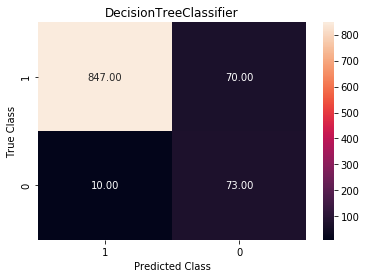

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

dtm = DecisionTreeClassifier(max_depth=4, random_state=42)
dtm.fit(X_train,y_train)

y_pred2 = dtm.predict(X_test)
# evaluating models for the training and testing accuracies
print("Training accuracy :", dtm.score(X_train, y_train))
print("Testing accuracy :", dtm.score(X_test, y_test))
print('**********************************************')

# confusion matrix
print(confusion_matrix(y_test, y_pred2))
print('**********************************************')

# scores of Accuracy, Precision, Recall and F1-Score
print("Accuracy:",accuracy_score(y_test,y_pred2))
print("Precision:",precision_score(y_test,y_pred2))
print("Recall:",recall_score(y_test,y_pred2))
print("F1 Score:",f1_score(y_test,y_pred2))


conf(dtm, X_test, y_test)

### Random Forest

Training accuracy : 0.9309901414487785
Testing accuracy : 0.92
**********************************************
[[848   9]
 [ 52  91]]
**********************************************
Accuracy: 0.939
Precision: 0.91
Recall: 0.6363636363636364
F1 Score: 0.7489711934156379


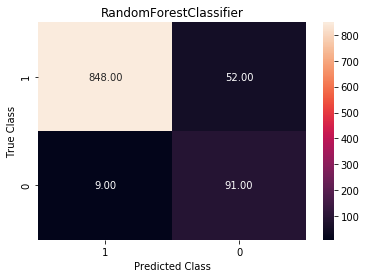

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score


rfm = RandomForestClassifier(n_estimators = 200, random_state=42)
rfm.fit(X_train, y_train)
y_pred3 = rfm.predict(X_test)

# evaluating models for the training and testing accuracies
print("Training accuracy :", dtm.score(X_train, y_train))
print("Testing accuracy :", dtm.score(X_test, y_test))
print('**********************************************')

# confusion matrix
print(confusion_matrix(y_test, y_pred3))
print('**********************************************')

# scores of Accuracy, Precision, Recall and F1-Score
print("Accuracy:",accuracy_score(y_test,y_pred3))
print("Precision:",precision_score(y_test,y_pred3))
print("Recall:",recall_score(y_test,y_pred3))
print("F1 Score:",f1_score(y_test,y_pred3))

conf(rfm, X_test, y_test)

Training accuracy : 0.9618516930990142
Testing accuracy : 0.94

**********************************************
[[844  13]
 [ 47  96]]

**********************************************
Accuracy: 0.94
Precision: 0.8807339449541285
Recall: 0.6713286713286714
F1 Score: 0.761904761904762

**********************************************


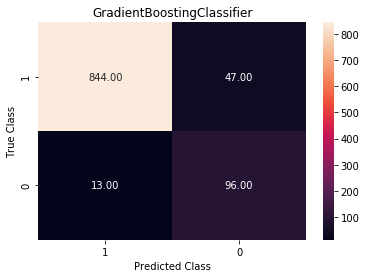

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(loss='deviance', learning_rate=0.2, n_estimators=200, max_depth=2)
gbm.fit(X_train, y_train)
y_pred4 = gbm.predict(X_test)

# evaluating models for the training and testing accuracies
print("Training accuracy :", gbm.score(X_train, y_train))
print("Testing accuracy :", gbm.score(X_test, y_test))

print('\n**********************************************')

# confusion matrix
print(confusion_matrix(y_test, y_pred4))

print('\n**********************************************')

# scores of Accuracy, Precision, Recall and F1-Score
print("Accuracy:",accuracy_score(y_test,y_pred4))
print("Precision:",precision_score(y_test,y_pred4))
print("Recall:",recall_score(y_test,y_pred4))
print("F1 Score:",f1_score(y_test,y_pred4))

print('\n**********************************************')

conf(gbm, X_test, y_test)